In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans,AgglomerativeClustering

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.cm as cm #visualizacion

In [3]:
from sklearn.metrics import calinski_harabasz_score #nueva metrica

In [4]:
data_absences=pd.read_csv('/home/jorge/Documents/Diplomado/Gen9_Mod3/data/Absenteeism_at_work.csv')

In [5]:
data_absences #separado de ;

,ID;Reason for absence;Month of absence;Day of the week;Seasons;Transportation expense;Distance from Residence to Work;Service time;Age;Work load Average/day ;Hit target;Disciplinary failure;Education;Son;Social drinker;Social smoker;Pet;Weight;Height;Body mass index;Absenteeism time in hours
0,11;26;7;3;1;289;36;13;33;239.554;97;0;1;2;1;0;...
1,36;0;7;3;1;118;13;18;50;239.554;97;1;1;1;1;0;0...
2,3;23;7;4;1;179;51;18;38;239.554;97;0;1;0;1;0;0...
3,7;7;7;5;1;279;5;14;39;239.554;97;0;1;2;1;1;0;6...
4,11;23;7;5;1;289;36;13;33;239.554;97;0;1;2;1;0;...
...,...
735,11;14;7;3;1;289;36;13;33;264.604;93;0;1;2;1;0;...
736,1;11;7;3;1;235;11;14;37;264.604;93;0;3;1;0;0;1...
737,4;0;0;3;1;118;14;13;40;271.219;95;0;1;1;1;0;8;...
738,8;0;0;4;2;231;35;14;39;271.219;95;0;1;2;1;0;2;...


In [6]:
df = pd.read_csv('../data/Absenteeism_at_work.csv', sep=';', header=0, index_col=0)

In [7]:
df #carga correcta
#clusterizamos por incidencias

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0


In [8]:
df.isnull().sum() #no hay nulos

Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [9]:
df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,,,,,,,,,,,,,,,,,,,,
11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,14,7,3,1,289,36,13,33,264.604,93,0,1,2,1,0,1,90,172,30,8
1,11,7,3,1,235,11,14,37,264.604,93,0,3,1,0,0,1,88,172,29,4
4,0,0,3,1,118,14,13,40,271.219,95,0,1,1,1,0,8,98,170,34,0


In [12]:
df['Reason for absence'].value_counts(1)
#Los datos estan codificados, podemos tomar acciones
# a lo mejor conviene no meter los categoricos pueden meter ruido
#no se incluye

23    0.201351
28    0.151351
27    0.093243
13    0.074324
0     0.058108
19    0.054054
22    0.051351
26    0.044595
25    0.041892
11    0.035135
10    0.033784
18    0.028378
14    0.025676
1     0.021622
7     0.020270
6     0.010811
12    0.010811
8     0.008108
21    0.008108
9     0.005405
5     0.004054
24    0.004054
16    0.004054
4     0.002703
15    0.002703
3     0.001351
2     0.001351
17    0.001351
Name: Reason for absence, dtype: float64

In [15]:
df['Hit target'].value_counts(1)
#No sabemos a que se refiere

93     0.141892
99     0.137838
97     0.120270
92     0.106757
96     0.101351
95     0.101351
98     0.089189
91     0.060811
94     0.045946
88     0.037838
81     0.025676
87     0.016216
100    0.014865
Name: Hit target, dtype: float64

In [16]:
df['Disciplinary failure'].value_counts(1)
#No siempre incluir variables de 0 y 1.
#se quita

0    0.945946
1    0.054054
Name: Disciplinary failure, dtype: float64

In [18]:
df['Education'].value_counts(1)
#Es categoria puede servir para el perfilamiento
# se puede incluir porque si hace sentido (al final o en el modelo)

1    0.825676
3    0.106757
2    0.062162
4    0.005405
Name: Education, dtype: float64

In [21]:
df['Body mass index'].value_counts(1)

31    0.198649
25    0.170270
24    0.116216
23    0.101351
28    0.079730
19    0.062162
30    0.054054
22    0.047297
27    0.032432
32    0.032432
29    0.031081
21    0.029730
38    0.025676
33    0.008108
36    0.006757
35    0.002703
34    0.001351
Name: Body mass index, dtype: float64

In [22]:
df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [23]:
"""Columnas seleccionadas
se quitaron moth of absence, day of the week, seasons. Ya que es un área
y no aportan información.
Algo que puede pasar en el cluster es que se agrupen por el dia y metan ruido
"""
cols=[x for x in df.columns if x not in ['Disciplinary failure','Reason for absence','Hit target',
                                       'Month of absence', 'Day of the week', 'Seasons', ]]

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_std=False)

sdf = ss.fit_transform(df[cols])

In [25]:
sdf

array([[  67.67027027,    6.36891892,    0.44594595, ...,   -0.11486486,
           3.32297297,   -2.92432432],
       [-103.32972973,  -16.63108108,    5.44594595, ...,    5.88513514,
           4.32297297,   -6.92432432],
       [ -42.32972973,   21.36891892,    5.44594595, ...,   -2.11486486,
           4.32297297,   -4.92432432],
       ...,
       [-103.32972973,  -15.63108108,    0.44594595, ...,   -2.11486486,
           7.32297297,   -6.92432432],
       [   9.67027027,    5.36891892,    1.44594595, ...,   -2.11486486,
           8.32297297,   -6.92432432],
       [ -42.32972973,   15.36891892,    1.44594595, ...,    2.88513514,
          -1.67702703,   -6.92432432]])

In [28]:
"""En la practica se recomienda probar con varias visualizaciones y
no solo con uno"""
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=15, random_state=1000)
data_tsne = tsne.fit_transform(sdf)
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
dff = pd.concat([df, df_tsne], axis=1)

In [29]:
df_tsne

,x,y
ID,,
11,10.527802,20.717617
36,27.361143,-3.628739
3,50.653706,11.888635
7,9.441816,14.192157
11,10.416549,20.679522
...,...,...
11,8.726501,24.791063
1,-38.714031,-7.683916
4,24.886305,-9.883045


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

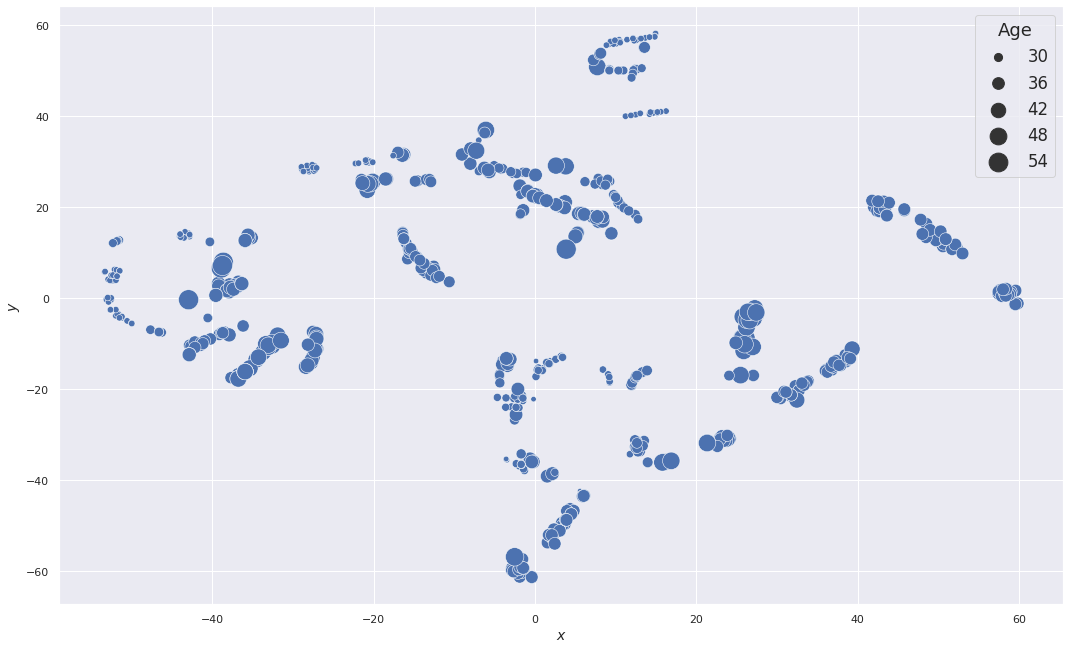

In [31]:
 sns.set()

fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
    sns.scatterplot(x='x',
                    y='y',
                    size='Age',
                    sizes=(30, 400),
                    palette=sns.color_palette("husl", 2),
                    data=dff,
                    ax=ax)

ax.set_xlabel(r'$x$', fontsize=14)
ax.set_ylabel(r'$y$', fontsize=14)

plt.show()

In [32]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

In [33]:
"""Iteramos sobre parametros de innteres"""
n_clusters = []
n_noise_points = []
silhouette_scores = [] #Metrica de calidad de los grupos
calinski_harabasz_scores = []

for p in [2, 4, 8, 12]: #Variamos la distancia, se puede dejar fija la distancia euclideana
    n_clusters_p = []
    n_noise_points_p = []
    silhouette_scores_p = []
    calinski_harabasz_scores_p = []

    for eps in np.arange(15, 30, 0.5): #Variamos el radio de la bola
        dst = DBSCAN(eps=eps, min_samples=3, metric='minkowski', p=p)
        Y_pred_t = dst.fit_predict(sdf)

        n_clusters_p.append(np.max(Y_pred_t) + 1)
        n_noise_points_p.append(np.sum(Y_pred_t == -1))
        silhouette_scores_p.append(silhouette_score(sdf, Y_pred_t, metric='minkowski', p=p))
        calinski_harabasz_scores_p.append(calinski_harabasz_score(sdf, Y_pred_t))

    n_clusters.append(n_clusters_p)
    n_noise_points.append(n_noise_points_p)
    silhouette_scores.append(silhouette_scores_p)
    calinski_harabasz_scores.append(calinski_harabasz_scores_p)

In [43]:
len(n_clusters[0]) #son 30 por la variacion del epsilon

30

In [42]:
np.arange(15, 30, 0.5).shape

(30,)

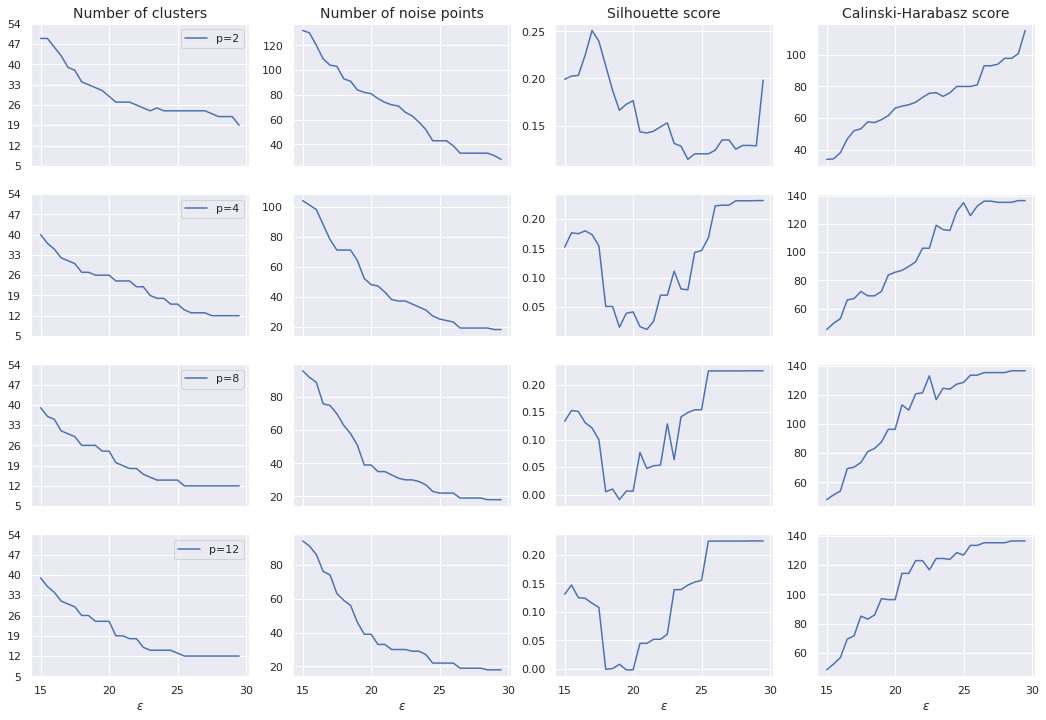

In [34]:
fig, ax = plt.subplots(4, 4, figsize=(18, 12), sharex=True)

for idx, p in enumerate([2, 4, 8, 12]):
    x = np.arange(15, 30, 0.5)

    ax[idx, 0].plot(x, n_clusters[idx], label='p={}'.format(p))
    ax[idx, 1].plot(x, n_noise_points[idx], label='p={}'.format(p))
    ax[idx, 2].plot(x, silhouette_scores[idx], label='p={}'.format(p))
    ax[idx, 3].plot(x, calinski_harabasz_scores[idx], label='p={}'.format(p))

ax[0, 0].set_title('Number of clusters', fontsize=14)
ax[0, 1].set_title('Number of noise points', fontsize=14)
ax[0, 2].set_title('Silhouette score', fontsize=14)
ax[0, 3].set_title('Calinski-Harabasz score', fontsize=14)

for i in range(4):
    ax[i, 0].set_yticks(np.arange(5, 60, 7))
    ax[i, 0].legend()
    ax[3, i].set_xlabel(r'$\epsilon$')

plt.show()

"""Hacemos una comparativa por p's en las filas.
La silueta mayor es con p=2 y e=20.
Puntos ruido pocos y pocos grupos y calinski alto.
Ganador p=12 y epsilon=25"""

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [45]:
ds = DBSCAN(eps=25, min_samples=3, metric='minkowski', p=12)
Y_pred = ds.fit_predict(sdf)
print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred==-1)))
print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred,
metric='minkowski', p=12)))
print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabasz_score(dff,
Y_pred)))

Number of clusters: 13
Number of noise points: 22
Silhouette score: 0.113
Calinski-Harabaz score: 110.678


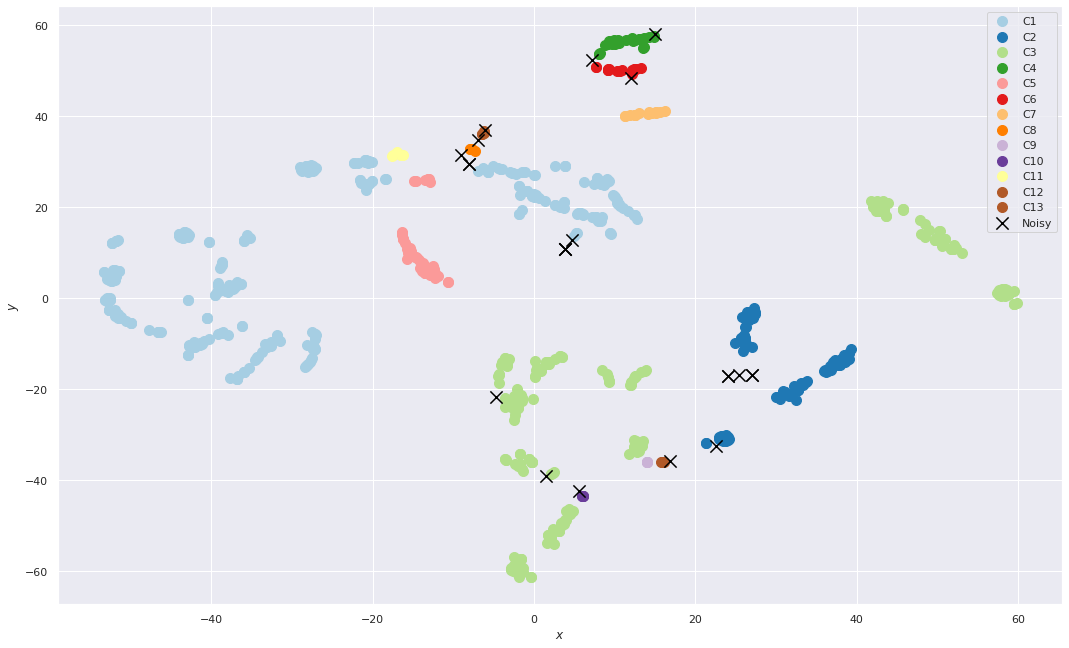

In [51]:
fig, ax = plt.subplots(figsize=(18, 11))

for i in range(np.max(np.unique(Y_pred)) + 1):
    ax.scatter(data_tsne[Y_pred == i, 0], data_tsne[Y_pred == i, 1], s=100, color=cm.Paired(i),
               label='C{}'.format(i + 1))

ax.scatter(data_tsne[Y_pred == -1, 0], data_tsne[Y_pred == -1, 1], marker='x', color='black', s=150, label='Noisy')

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()

plt.show()

"""Elecciones por densidad"""

In [55]:
data_to_profile=pd.DataFrame(sdf,columns=cols)

In [58]:
data_to_profile['cl']= ds.fit_predict(sdf)

In [59]:
data_to_profile

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,cl
0,67.67027,6.368919,0.445946,-3.45,-31.936235,-0.291892,0.981081,0.432432,-0.072973,0.254054,10.964865,-0.114865,3.322973,-2.924324,0
1,-103.32973,-16.631081,5.445946,13.55,-31.936235,-0.291892,-0.018919,0.432432,-0.072973,-0.745946,18.964865,5.885135,4.322973,-6.924324,1
2,-42.32973,21.368919,5.445946,1.55,-31.936235,-0.291892,-1.018919,0.432432,-0.072973,-0.745946,9.964865,-2.114865,4.322973,-4.924324,2
3,57.67027,-24.631081,1.445946,2.55,-31.936235,-0.291892,0.981081,0.432432,0.927027,-0.745946,-11.035135,-4.114865,-2.677027,-2.924324,0
4,67.67027,6.368919,0.445946,-3.45,-31.936235,-0.291892,0.981081,0.432432,-0.072973,0.254054,10.964865,-0.114865,3.322973,-4.924324,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,67.67027,6.368919,0.445946,-3.45,-6.886235,-0.291892,0.981081,0.432432,-0.072973,0.254054,10.964865,-0.114865,3.322973,1.075676,0
736,13.67027,-18.631081,1.445946,0.55,-6.886235,1.708108,-0.018919,-0.567568,-0.072973,0.254054,8.964865,-0.114865,2.322973,-2.924324,0
737,-103.32973,-15.631081,0.445946,3.55,-0.271235,-0.291892,-0.018919,0.432432,-0.072973,7.254054,18.964865,-2.114865,7.322973,-6.924324,1
738,9.67027,5.368919,1.445946,2.55,-0.271235,-0.291892,0.981081,0.432432,-0.072973,1.254054,20.964865,-2.114865,8.322973,-6.924324,0


In [60]:
data_to_profile.groupby('cl').mean().style.background_gradient(cmap='Blues')

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
cl,,,,,,,,,,,,,,
-1,9.352088,-10.358354,-0.644963,1.868182,27.636265,-0.110074,0.208354,-0.113022,0.154300,-0.155037,-2.671499,2.248771,-1.677027,50.348403
0,29.848964,-3.277129,-0.485326,0.306014,-2.740005,0.003641,0.101356,-0.079595,-0.024863,0.573642,-0.021389,-1.754040,0.491358,-1.587555
1,-103.329730,-18.428700,0.576898,5.288095,-5.980318,-0.291892,-0.614157,-0.186615,-0.049163,-0.650708,9.131532,2.004183,2.358687,-3.519562
2,-45.076274,7.650025,2.174057,-1.067512,-5.803295,0.210412,-0.553481,0.068377,0.046843,-0.667605,-0.620389,1.161633,-0.405138,-1.716951
3,142.939501,21.791996,-8.015593,-6.911538,-18.577581,-0.291892,0.173389,0.240125,0.119335,3.254054,-1.919751,0.269751,-0.830873,-1.001247
4,38.670270,20.368919,-1.554054,-0.450000,-4.288664,-0.291892,2.981081,0.432432,-0.072973,-0.745946,-14.035135,-4.114865,-3.677027,0.361390
5,150.045270,-12.881081,-0.929054,-3.075000,-4.955423,-0.291892,1.606081,0.307432,-0.072973,-0.745946,-8.285135,-1.989865,-1.802027,0.513176
6,108.670270,-13.631081,-8.554054,-8.450000,-12.412568,0.708108,-1.018919,-0.567568,-0.072973,-0.745946,4.964865,9.885135,-1.677027,0.942342
7,68.170270,8.118919,4.195946,2.300000,106.726765,-0.291892,0.231081,0.182432,-0.072973,0.504054,11.214865,-0.364865,3.572973,2.575676


In [61]:
data_to_profile['cl'].value_counts(1) #Hay grupos pequeños que tienen
#menos frecuencia del ruido que no son recomendables

 0     0.393243
 2     0.293243
 1     0.113514
 4     0.056757
 3     0.035135
-1     0.029730
 5     0.021622
 6     0.020270
 10    0.009459
 9     0.006757
 11    0.005405
 8     0.005405
 7     0.005405
 12    0.004054
Name: cl, dtype: float64

Lo que afecta mas es el numero de samples y no tanto a la metrica

In [ ]:
ds = DBSCAN(eps=25, min_samples=8, metric='minkowski', p=8)
Y_pred = ds.fit_predict(sdf)
print('Number of clusters: {}'.format(np.max(Y_pred) + 1))
print('Number of noise points: {}'.format(np.sum(Y_pred==-1)))
print('Silhouette score: {:.3f}'.format(silhouette_score(dff, Y_pred,
metric='minkowski', p=8)))
print('Calinski-Harabaz score: {:.3f}'.format(calinski_harabasz_score(dff,
Y_pred)))